### **Customer Purchase Predictition**

**Import libraries**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import Dataset
data = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Customer%20Purchase.csv")

**Describe Dataset**

In [24]:
print("First 5 rows of the dataset:")
data. head()

First 5 rows of the dataset:


,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


In [25]:
print("\nLast 5 rows of the dataset:")
data.tail()


Last 5 rows of the dataset:


,Customer ID,Age,Gender,Education,Review,Purchased
45,1066,61,Male,PG,Poor,Yes
46,1067,64,Female,PG,Poor,No
47,1068,38,Female,PG,Good,Yes
48,1069,39,Female,UG,Good,Yes
49,1070,25,Female,UG,Good,No


In [26]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  50 non-null     int64 
 1   Age          50 non-null     int64 
 2   Gender       50 non-null     object
 3   Education    50 non-null     object
 4   Review       50 non-null     object
 5   Purchased    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [27]:
print("\nDataset Description:")
data.describe()


Dataset Description:


,Customer ID,Age
count,50.00000,50.000000
mean,1045.50000,54.160000
std,14.57738,25.658161
min,1021.00000,15.000000
25%,1033.25000,30.250000
50%,1045.50000,57.000000
75%,1057.75000,74.000000
max,1070.00000,98.000000


In [28]:
print("\nDataset Shape:", data.shape)


Dataset Shape: (50, 6)


In [29]:
print("\nData Types of Columns:", data.dtypes)


Data Types of Columns: Customer ID     int64
Age             int64
Gender         object
Education      object
Review         object
Purchased      object
dtype: object


In [31]:
print("\nColumn Names:", data.columns)


Column Names: Index(['Customer ID', 'Age', 'Gender', 'Education', 'Review', 'Purchased'], dtype='object')


**Exploratory Data Analysis (EDA)**

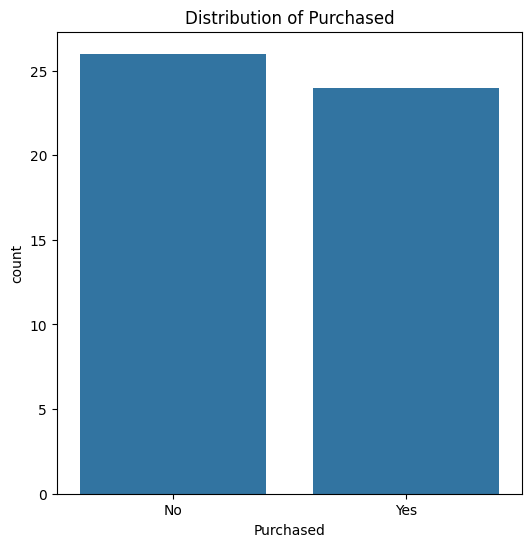

In [46]:
# Visualization of the relationship between features and the target variable

plt.figure(figsize=(6, 6))
sns.countplot(x='Purchased', data=data)
plt.title('Distribution of Purchased')
plt.show()

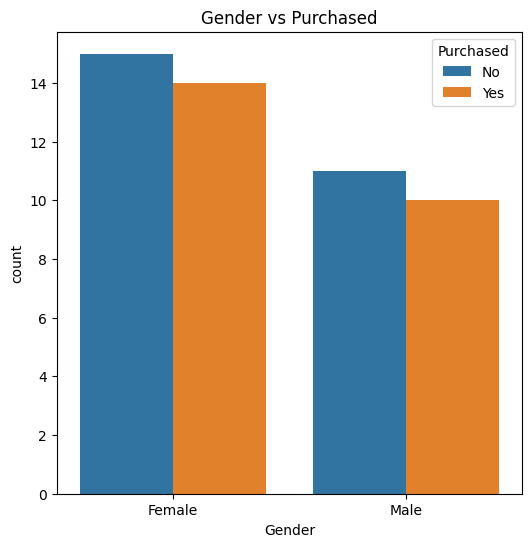

In [48]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', hue='Purchased', data=data)
plt.title('Gender vs Purchased')
plt.show()

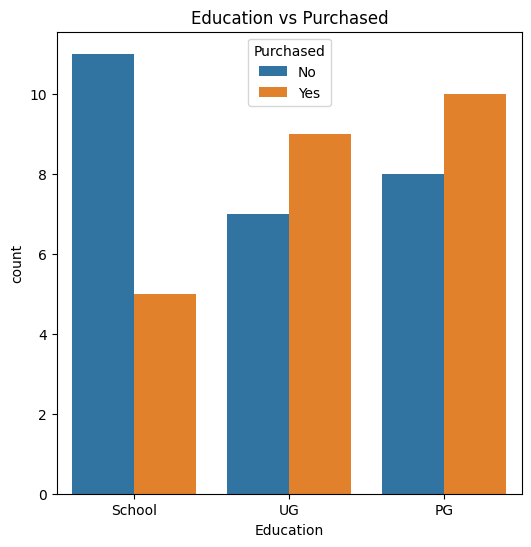

In [49]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Education', hue='Purchased', data=data)
plt.title('Education vs Purchased')
plt.show()

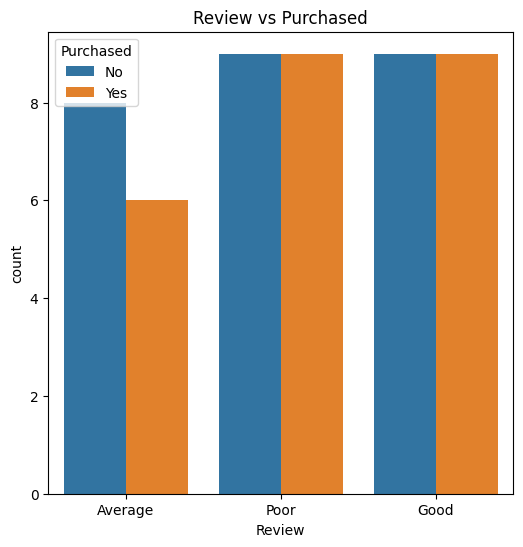

In [51]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Review', hue='Purchased', data=data)
plt.title('Review vs Purchased')
plt.show()

**Data Preprocessing**

In [9]:
X = data.drop(["Purchased","Customer ID"], axis = 1)
Y = data["Purchased"]

In [32]:
# Encoding categorical variables

X.replace({'Review':{'Poor':0,'Average':1,'Good':2}},inplace=True)
X.replace({'Education':{'School':0,'UG':1,'PG':2}},inplace=True)
X.replace({'Gender':{'Female':0,'Male':1}}, inplace=True)

In [33]:
print("\nFirst 15 rows after encoding:")
X.head(15)


First 15 rows after encoding:


,Age,Gender,Education,Review
0,30,0,0,1
1,68,0,1,0
2,70,0,2,2
3,72,0,2,2
4,16,0,1,1
5,31,0,0,1
6,18,1,0,2
7,60,0,0,0
8,65,0,1,1
9,74,1,1,2


**# Splitting the dataset**

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2529)
print("\nTrain and Test shapes:", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)



Train and Test shapes: (35, 4) (15, 4) (35,) (15,)


**Model Training**

In [35]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

**Predictions**

In [16]:
y_pred = model.predict(X_test)
y_pred

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No'], dtype=object)

In [36]:
# Prediction on new data

new_data = pd.DataFrame({'Age': [22], 'Gender': [1], 'Education': [2], 'Review': [2]})
pred = model.predict(new_data)
print("\nPrediction for new data:", pred)


Prediction for new data: ['No']


**Model Evaluation**

In [37]:
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [38]:
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.6666666666666666


In [39]:
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[7 0]
 [5 3]]


In [40]:
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

          No       0.58      1.00      0.74         7
         Yes       1.00      0.38      0.55         8

    accuracy                           0.67        15
   macro avg       0.79      0.69      0.64        15
weighted avg       0.81      0.67      0.63        15



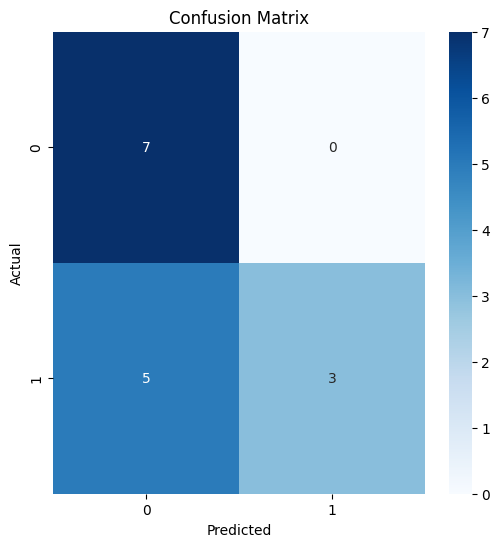

In [53]:
# Visualization of the confusion matrix

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()